In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
url = 'https://raw.githubusercontent.com/ovlathkar/Project_using_KNN/refs/heads/main/bangalore%20house%20price%20prediction%20OHE-data.csv'
data = pd.read_csv(url)
data.head(5)

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(7120, 108)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(5), int64(103)
memory usage: 5.9 MB


In [5]:
data.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [6]:
numerical_cols = ['price', 'total_sqft_int', 'bath', 'balcony', 'bhk', 'price_per_sqft']

In [7]:
summary_stats = data[numerical_cols]
print("Summary Statistics:")
#print(summary_stats.describe())
print(summary_stats)

Summary Statistics:
       price  total_sqft_int  bath  balcony  bhk  price_per_sqft
0     150.00          1672.0   3.0      2.0    3     8971.291866
1     149.00          1750.0   3.0      3.0    3     8514.285714
2     150.00          1750.0   3.0      2.0    3     8571.428571
3      40.00          1250.0   2.0      2.0    2     3200.000000
4      83.00          1200.0   2.0      2.0    2     6916.666667
...      ...             ...   ...      ...  ...             ...
7115  325.00          2900.0   3.0      2.0    3    11206.896552
7116   84.83          1780.0   3.0      1.0    3     4765.730337
7117   48.00           880.0   2.0      1.0    2     5454.545455
7118   55.00          1000.0   2.0      1.0    2     5500.000000
7119   78.00          1400.0   2.0      1.0    3     5571.428571

[7120 rows x 6 columns]


In [8]:
print("\n Insights:")
print("1. Average Price:", summary_stats['price'].mean())
print("2. Average Total Square Feet:", summary_stats['total_sqft_int'].mean())
print("3. Average Bathrooms:", summary_stats['bath'].mean())
print("4. Average Balconies:", summary_stats['balcony'].mean())
print("5. Average Bedrooms:", summary_stats['bhk'].mean())
print("6. Average Price per Square Feet:", summary_stats['price_per_sqft'].mean())



 Insights:
1. Average Price: 96.45499087078652
2. Average Total Square Feet: 1479.729806179775
3. Average Bathrooms: 2.390870786516854
4. Average Balconies: 1.5727589745765636
5. Average Bedrooms: 2.465168539325843
6. Average Price per Square Feet: 5923.806854903391


Distribution Plots


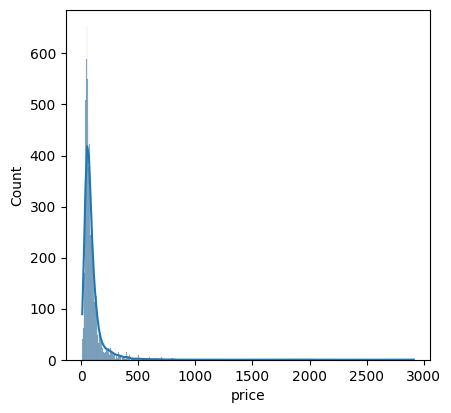

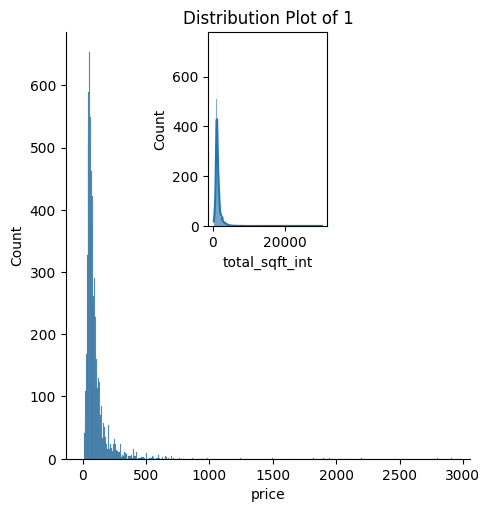

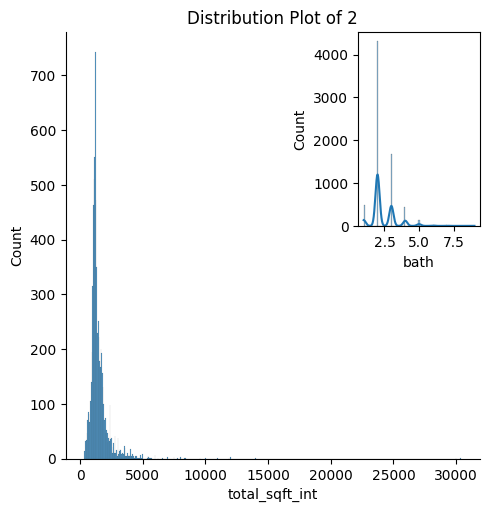

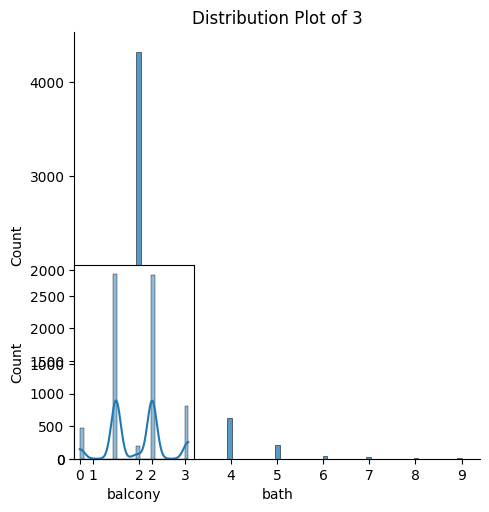

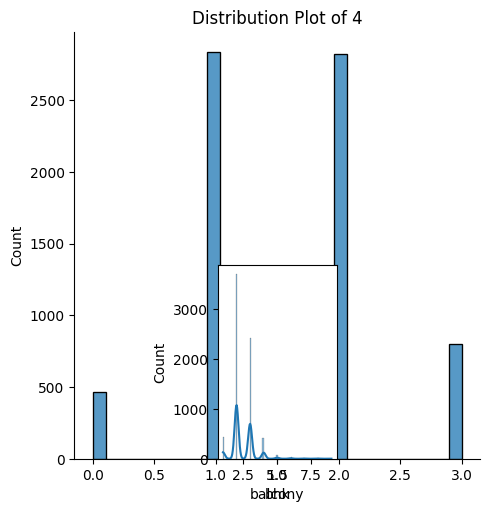

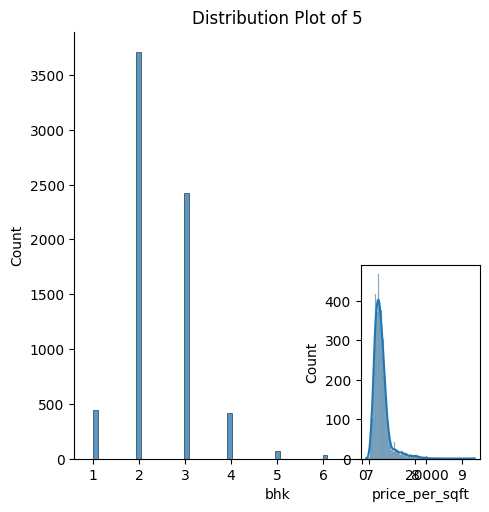

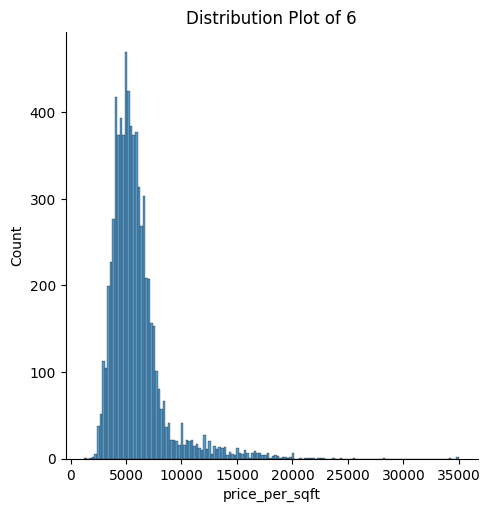

In [9]:
print("Distribution Plots")
plt.figure(figsize=(16,10))
for i, col in enumerate (numerical_cols,1):
    plt.subplot(2,3,i)
    sns.histplot(data[col],kde=True)
    sns.displot(data[col])
    plt.title(f'Distribution Plot of {i}')
plt.tight_layout
plt.show()


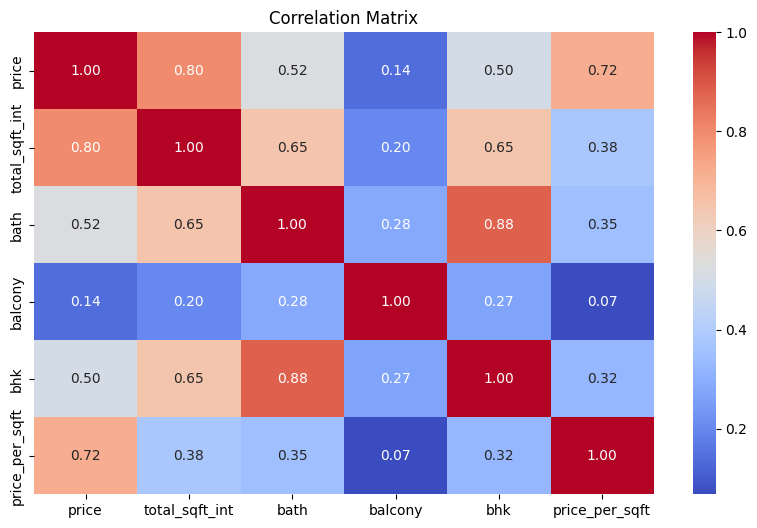

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [11]:
print("\n📌 Correlation Insights:")
corr_matrix = data[numerical_cols].corr()
print(f"- Price is strongly correlated with sqft: {corr_matrix.loc['price', 'total_sqft_int']:.2f}")
print(f"- BHK also has positive influence: {corr_matrix.loc['price', 'bhk']:.2f}")
print("- Balconies and bathrooms have mild influence on price")



📌 Correlation Insights:
- Price is strongly correlated with sqft: 0.80
- BHK also has positive influence: 0.50
- Balconies and bathrooms have mild influence on price


Scatter Plot for sqft. vs price


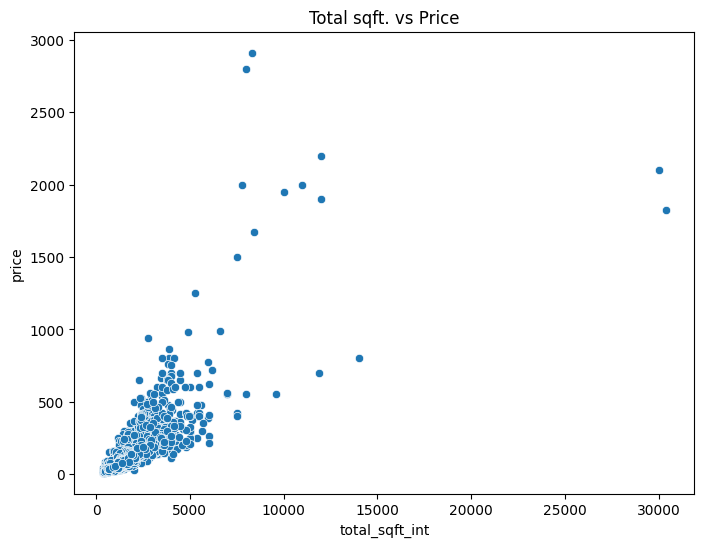

Scatter plot insight
Positive trend betewwen sqft and price


In [12]:
print("Scatter Plot for sqft. vs price")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft_int', y='price', data=data)
plt.title("Total sqft. vs Price")
plt.show()
print("Scatter plot insight")
print("Positive trend betewwen sqft and price")

Box plot for BHK vs price


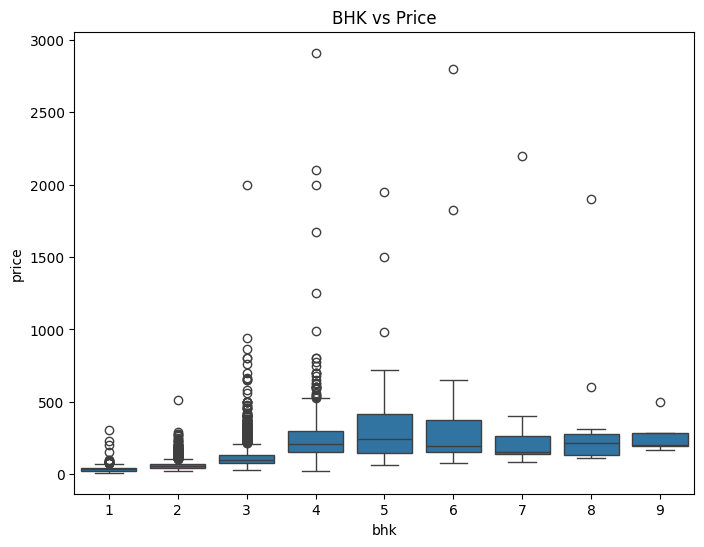

Box plot insight
- Smaller homes (1–2 BHK) often have higher price/sqft — likely in prime locations
- Larger homes (5+ BHK) tend to have lower price/sqft


In [13]:
print("Box plot for BHK vs price")
plt.figure(figsize=(8, 6))
sns.boxplot(x='bhk', y='price', data=data)
plt.title("BHK vs Price")
plt.show()
print("Box plot insight")
print("- Smaller homes (1–2 BHK) often have higher price/sqft — likely in prime locations")
print("- Larger homes (5+ BHK) tend to have lower price/sqft")

In [14]:
print("Print price per sqft outliers")
pps_uppler_limit = data['price_per_sqft'].quantile(0.99)
data_cleaned = data[data['price_per_sqft']<pps_uppler_limit]
data_cleaned.head(5)

Print price per sqft outliers


,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X = data_cleaned.drop(['price', 'price_per_sqft'], axis = 1)
y = data_cleaned['price']
X
y

,price
0,150.00
1,149.00
2,150.00
3,40.00
4,83.00
...,...
7115,325.00
7116,84.83
7117,48.00
7118,55.00


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print("Train/test splitting done!!!")

Train/test splitting done!!!


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model training Completed")

Model training Completed


In [18]:
y_pred = model.predict(X_test)
y_pred

array([ 18.01707296, 109.26978283, 249.49879336, ...,  79.74698437,
        81.22345568,  76.34131902])

In [19]:
print("Table showing actual data and predicted data")
comparison_data = pd.DataFrame({'Actual Price (Lakhs)': y_test.values,
                               'Predicted Price (Lakhs)':y_pred})
print(comparison_data.head(20))

Table showing actual data and predicted data
    Actual Price (Lakhs)  Predicted Price (Lakhs)
0                  36.00                18.017073
1                 107.00               109.269783
2                 275.00               249.498793
3                  53.76                82.307464
4                  43.00                45.974431
5                  50.00                63.428136
6                 150.00               320.037131
7                  46.00                57.460661
8                 177.00               189.480879
9                  36.00                57.592680
10                 50.00                35.552239
11                195.00               282.321680
12                 46.00                53.905886
13                 46.50                59.579472
14                 48.00                69.471149
15                 55.00                59.651253
16                 78.00                96.304532
17                 65.00                59.476810
18   

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Model Evaluation")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f} Lakhs")
print(f"Root Mean Squared Error: {rmse:.2f} Lakhs")

Model Evaluation
R² Score: 0.78
Mean Absolute Error: 17.57 Lakhs
Root Mean Squared Error: 30.99 Lakhs
